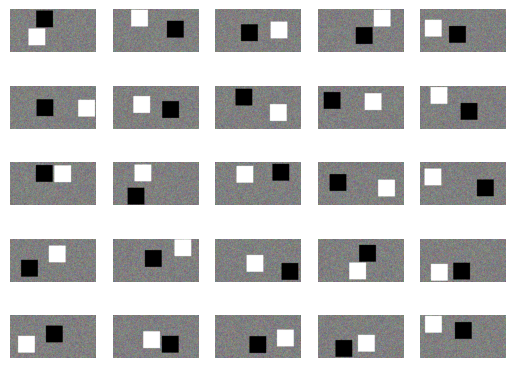

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_images_with_non_overlapping_squares(num_batches, batch_size, height, width, square_size):
    images = []

    for _ in range(num_batches):
        batch = np.random.randint(0, 256, size=(batch_size, height, width, 3), dtype=np.uint8)

        for image in batch:
            # Randomly place the first square
            x1, y1 = np.random.randint(0, width - square_size), np.random.randint(0, height - square_size)
            image[y1:y1+square_size, x1:x1+square_size] = [255, 255, 255]  # White square

            # Randomly place the second square without overlapping the first
            x2, y2 = np.random.randint(0, width - square_size), np.random.randint(0, height - square_size)
            while (
                (x2 >= x1 - square_size and x2 <= x1 + square_size) and
                (y2 >= y1 - square_size and y2 <= y1 + square_size)
            ):
                x2, y2 = np.random.randint(0, width - square_size), np.random.randint(0, height - square_size)

            image[y2:y2+square_size, x2:x2+square_size] = [0, 0, 0]  # Black square

        images.append(batch)

    return images

# Set parameters
num_batches = 5
batch_size = 5
height = 256
width = 512
square_size = 100

# Generate random RGB images with non-overlapping squares
random_images_with_squares = generate_random_images_with_non_overlapping_squares(num_batches, batch_size, height, width, square_size)

# Display the generated images (optional)
for i, batch in enumerate(random_images_with_squares):
    for j, image in enumerate(batch):
        plt.subplot(batch_size, num_batches, i * batch_size + j + 1)
        plt.imshow(image)
        plt.axis('off')

plt.show()


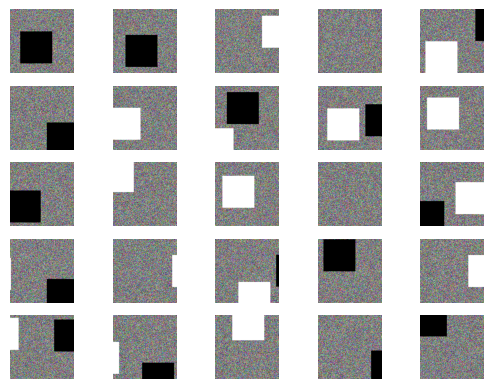

In [38]:
def crop_image_randomly(image, crop_size):
    height, width, _ = image.shape
    x = np.random.randint(0, width - crop_size)
    y = np.random.randint(0, height - crop_size)
    return image[y:y+crop_size, x:x+crop_size]

crop_size = 200

# Generate random RGB images with non-overlapping squares
random_images_with_squares = generate_random_images_with_non_overlapping_squares(num_batches, batch_size, height, width, square_size)

# Crop each image randomly to a square of size 200x200 pixels
cropped_images = []
for batch in random_images_with_squares:
    cropped_batch = []
    for image in batch:
        cropped_image = crop_image_randomly(image, crop_size)
        cropped_batch.append(cropped_image)
    cropped_images.append(cropped_batch)

# Display the cropped images (optional)
for i, batch in enumerate(cropped_images):
    for j, image in enumerate(batch):
        plt.subplot(batch_size, num_batches, i * batch_size + j + 1)
        plt.imshow(image)
        plt.axis('off')

plt.show()


In [39]:
from PIL import Image

# Function to save images to disk
def save_images(images, output_path):
    for i, batch in enumerate(images):
        for j, image in enumerate(batch):
            img = Image.fromarray(image)
            img_path = f"{output_path}/batch_{i + 1}_image_{j + 1}.png"
            img.save(img_path)

# Set the output path where you want to save the images
output_path = "/kaggle/working/images"

# Create the output directory
import os
os.makedirs(output_path, exist_ok=True)

# Save the generated images
save_images(cropped_images, output_path)

In [41]:
def count_pixels(image, color):
    return np.sum(np.all(image == color, axis=-1))

# Define colors
white = np.array([255, 255, 255], dtype=np.uint8)
black = np.array([0, 0, 0], dtype=np.uint8)

# Calculate the average and standard deviation of the number of pixels in each color for each batch
for i, batch in enumerate(cropped_images):
    white_counts = []
    black_counts = []
    for image in batch:
        white_count = count_pixels(image, white)
        black_count = count_pixels(image, black)
        white_counts.append(white_count)
        black_counts.append(black_count)
    white_avg = np.mean(white_counts)
    white_std = np.std(white_counts)
    black_avg = np.mean(black_counts)
    black_std = np.std(black_counts)
    print(f"Batch {i+1}:")
    print(f"White - Average: {white_avg}, Standard Deviation: {white_std}")
    print(f"Black - Average: {black_avg}, Standard Deviation: {black_std}")

Batch 1:
White - Average: 3040.0, Standard Deviation: 3997.2990881343867
Black - Average: 4540.0, Standard Deviation: 4565.785803123051
Batch 2:
White - Average: 6508.8, Standard Deviation: 3941.8967211229674
Black - Average: 4502.0, Standard Deviation: 3978.3433738178005
Batch 3:
White - Average: 5002.0, Standard Deviation: 4276.495761718933
Black - Average: 3105.6, Standard Deviation: 3976.868798439295
Batch 4:
White - Average: 2660.0, Standard Deviation: 2628.0030441382673
Black - Average: 3455.0, Standard Deviation: 4043.896635672084
Batch 5:
White - Average: 2500.0, Standard Deviation: 2900.344807087599
Black - Average: 3990.8, Standard Deviation: 2264.8901430312244


In [42]:
import pandas as pd

# Initialize a list to store the data
data = []

# Calculate the average, min, max, and standard deviation of the number of pixels in each color for each batch
for i, batch in enumerate(cropped_images):
    white_counts = []
    black_counts = []
    for image in batch:
        white_count = count_pixels(image, white)
        black_count = count_pixels(image, black)
        white_counts.append(white_count)
        black_counts.append(black_count)
    white_avg = np.mean(white_counts)
    white_min = np.min(white_counts)
    white_max = np.max(white_counts)
    white_std = np.std(white_counts)
    black_avg = np.mean(black_counts)
    black_min = np.min(black_counts)
    black_max = np.max(black_counts)
    black_std = np.std(black_counts)
    data.append([i+1, white_avg, white_min, white_max, white_std, black_avg, black_min, black_max, black_std])

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['batch_id', 'white_avg', 'white_min', 'white_max', 'white_std', 'black_avg', 'black_min', 'black_max', 'black_std'])

# Save the DataFrame to disk as a Parquet file
df.to_parquet('pixel_data.parquet')

In [ ]:
import ipytest
ipytest.autoconfig()

def test_count_pixels():
    # Test case 1: Image contains the color
    image1 = np.array([[[255, 255, 255], [0, 0, 0]], [[255, 255, 255], [0, 0, 0]]], dtype=np.uint8)
    color1 = np.array([255, 255, 255], dtype=np.uint8)
    assert count_pixels(image1, color1) == 2

    # Test case 2: Image does not contain the color
    image2 = np.array([[[255, 255, 255], [255, 255, 255]], [[255, 255, 255], [255, 255, 255]]], dtype=np.uint8)
    color2 = np.array([0, 0, 0], dtype=np.uint8)
    assert count_pixels(image2, color2) == 0

ipytest.run('-qq')

In [ ]:
def test_image_size():
    # Test case 1: Image is 200x200 pixels
    image1 = np.random.randint(0, 256, (200, 200, 3), dtype=np.uint8)
    assert image1.shape == (200, 200, 3)

    # Test case 2: Image is not 200x200 pixels
    image2 = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)
    assert image2.shape != (200, 200, 3)

In [ ]:
def test_squares_not_overlapped():
    # Test case 1: Squares are not overlapped
    square1 = {"x": 0, "y": 0, "width": 100, "height": 100}
    square2 = {"x": 200, "y": 0, "width": 100, "height": 100}
    assert square1["x"] + square1["width"] <= square2["x"] or square2["x"] + square2["width"] <= square1["x"] or square1["y"] + square1["height"] <= square2["y"] or square2["y"] + square2["height"] <= square1["y"]

    # Test case 2: Squares are overlapped
    square3 = {"x": 0, "y": 0, "width": 100, "height": 100}
    square4 = {"x": 50, "y": 0, "width": 100, "height": 100}
    assert not (square3["x"] + square3["width"] <= square4["x"] or square4["x"] + square4["width"] <= square3["x"] or square3["y"] + square3["height"] <= square4["y"] or square4["y"] + square4["height"] <= square3["y"])